In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Files/heart_attack_prediction_dataset.csv")

In [ ]:
df.drop(columns='Patient ID',inplace = True)


In [ ]:
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [ ]:
mean = df['Age'].mean()
first_age_group = df[df['Age']<mean]
second_age_group = df[df['Age']>mean]
age1 = df[df['Heart Attack Risk']==0]
fg = df.drop(columns=["Heart Rate","Family History","Exercise Hours Per Week","Diet","Sedentary Hours Per Day","Triglycerides","Physical Activity Days Per Week","Sleep Hours Per Day","Continent","Country","Hemisphere"])
age = fg.groupby('Age')['Heart Attack Risk'].sum()
age = pd.DataFrame(age)
age.reset_index(inplace = True)
age1= age1.groupby('Age')['Heart Attack Risk'].count()

age1 = pd.DataFrame(age1)


Text(0, 0.5, 'Кол-во рисков')

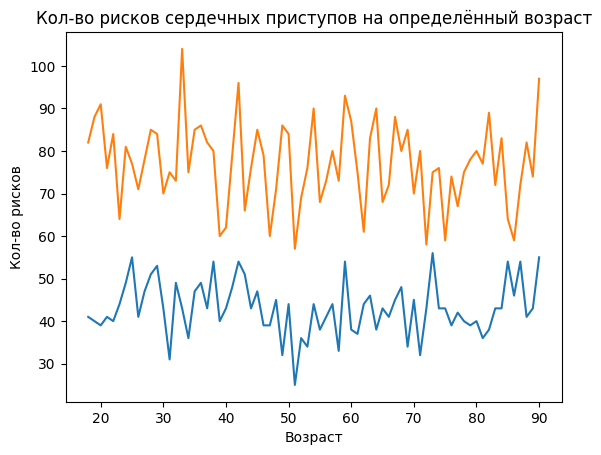

In [ ]:
y = list(age['Heart Attack Risk'])
x= list(age['Age'])
y2 = list(age1['Heart Attack Risk'])
plt.plot(x,y)
plt.plot(x,y2)
plt.title("Кол-во рисков сердечных приступов на определённый возраст")
plt.xlabel("Возраст",color="black")
plt.ylabel("Кол-во рисков")

Text(0.5, 1.0, 'Первая возрастная группа')

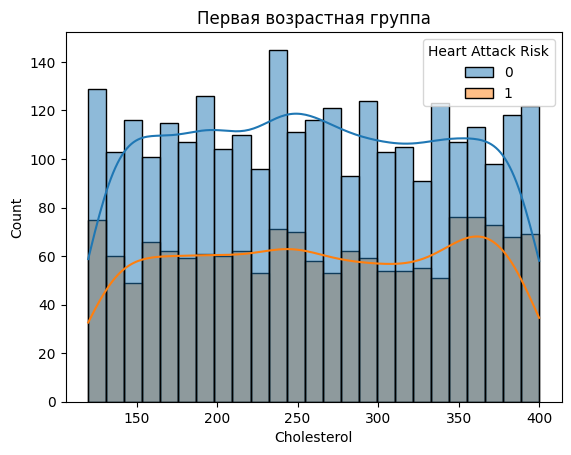

In [ ]:
sns.histplot(x='Cholesterol', hue='Heart Attack Risk', data=first_age_group, bins=25, kde=True)
plt.title('Первая возрастная группа')

Text(0.5, 1.0, 'Первая возрастная группа')

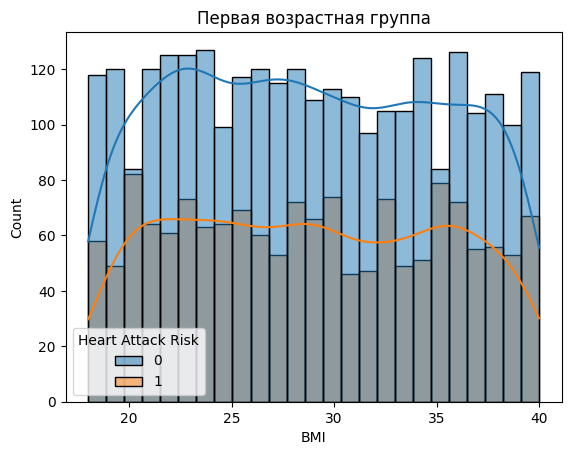

In [ ]:
sns.histplot(x='BMI', hue='Heart Attack Risk', data=first_age_group, bins=25, kde=True)
plt.title('Первая возрастная группа')

Text(0.5, 1.0, 'Вторая возрастная группа')

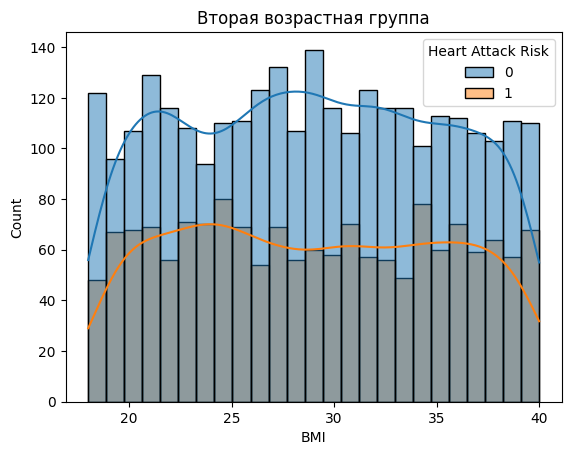

In [ ]:
sns.histplot(x='BMI', hue='Heart Attack Risk', data=second_age_group, bins=25, kde=True)
plt.title('Вторая возрастная группа')

Text(0.5, 1.0, 'Вторая возрастная группа')

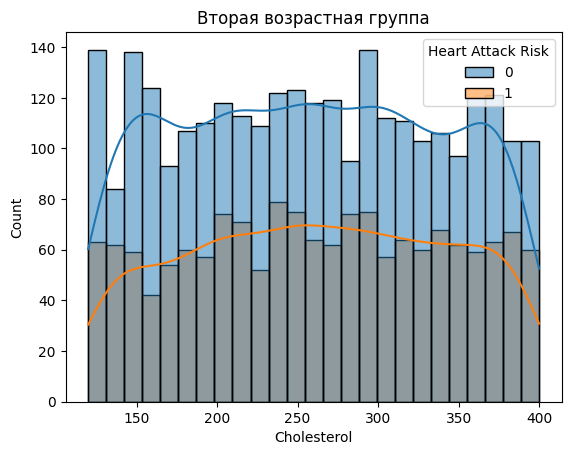

In [ ]:
sns.histplot(x='Cholesterol', hue='Heart Attack Risk', data=second_age_group, bins=25, kde=True)
plt.title('Вторая возрастная группа')

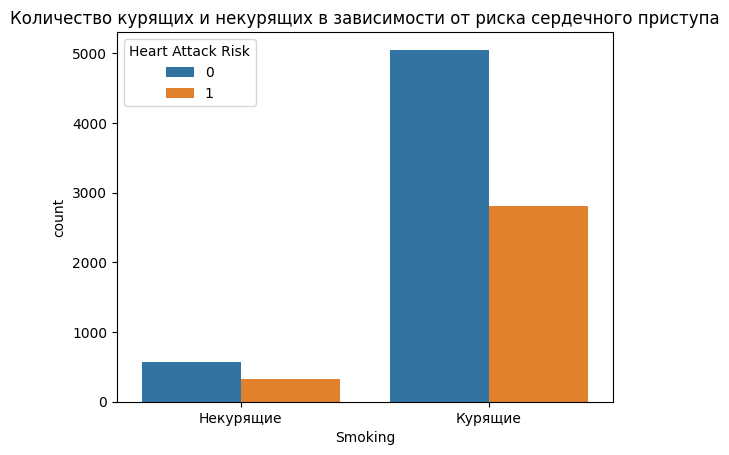

In [ ]:
f = sns.countplot(x='Smoking', hue='Heart Attack Risk', data=df)
f.set_xticklabels(("Некурящие","Курящие"))
plt.title('Количество курящих и некурящих в зависимости от риска сердечного приступа')
plt.show()


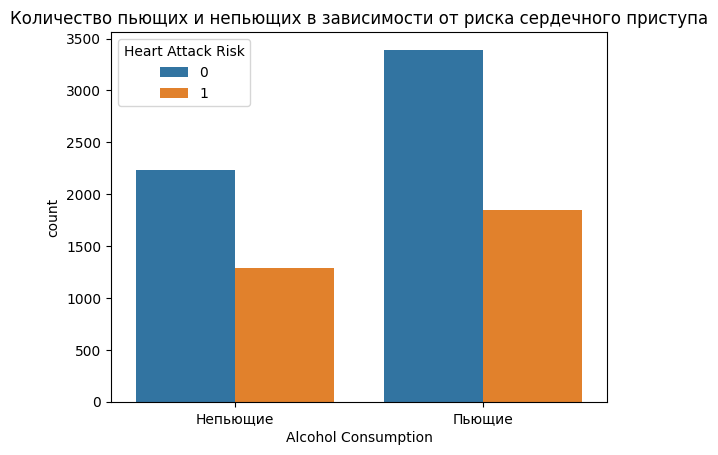

In [ ]:
d = sns.countplot(x='Alcohol Consumption', hue='Heart Attack Risk', data=df)
d.set_xticklabels(("Непьющие","Пьющие"))
plt.title('Количество пьющих и непьющих в зависимости от риска сердечного приступа')
plt.show()

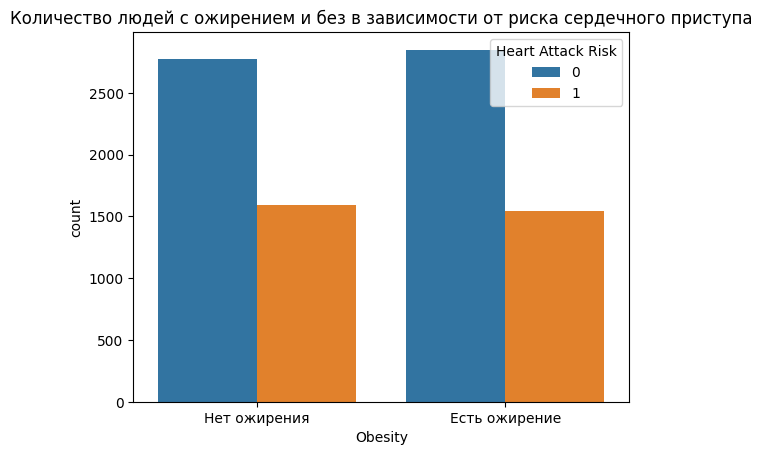

In [ ]:
g = sns.countplot(x='Obesity', hue='Heart Attack Risk', data=df)
g.set_xticklabels(("Нет ожирения","Есть ожирение"))
plt.title('Количество людей с ожирением и без в зависимости от риска сердечного приступа')
plt.show()

Text(0, 0.5, 'Кол-во сердечных приступов')

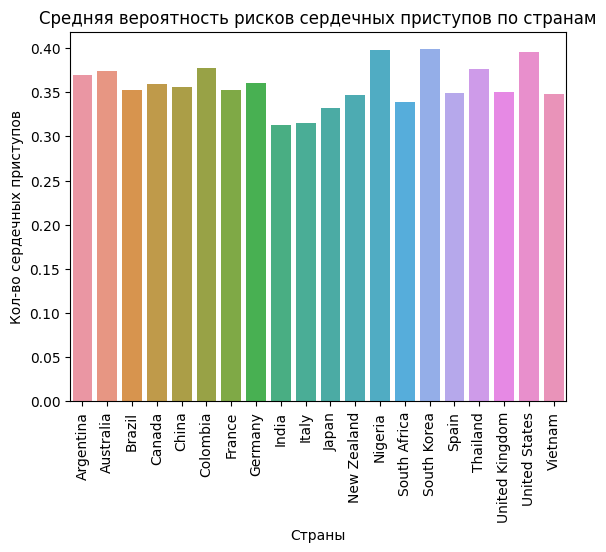

In [ ]:
resd = df.groupby('Country')["Heart Attack Risk"].mean()
rs3 = pd.DataFrame(resd)
rs3.reset_index(inplace = True)
d3 = sns.barplot(data=rs3,x=rs3['Country'],y=rs3['Heart Attack Risk'])
d3.set_title("Средняя вероятность рисков сердечных приступов по странам")
d3.set_xticklabels(d3.get_xticklabels(),rotation=90)
d3.set_xlabel("Страны")
d3.set_ylabel("Кол-во сердечных приступов")

In [ ]:
resd

Country
Argentina         0.369427
Australia         0.374165
Brazil            0.352814
Canada            0.359091
China             0.355505
Colombia          0.377622
France            0.352018
Germany           0.360587
India             0.313107
Italy             0.315545
Japan             0.332564
New Zealand       0.347126
Nigeria           0.397321
South Africa      0.338824
South Korea       0.398533
Spain             0.348837
Thailand          0.376168
United Kingdom    0.350109
United States     0.395238
Vietnam           0.348235
Name: Heart Attack Risk, dtype: float64

In [ ]:
resss = pd.DataFrame(df.groupby('Country')["Heart Attack Risk"].sum())
resss.reset_index(inplace=True)
print(resss.iloc[resss['Heart Attack Risk'].idxmax()],end='\n')
print(resss.iloc[resss['Heart Attack Risk'].idxmin()])

Country              Nigeria
Heart Attack Risk        178
Name: 12, dtype: object
Country              India
Heart Attack Risk      129
Name: 8, dtype: object


Text(0.5, 1.0, 'Кол-во сердечных приступов в разных странах')

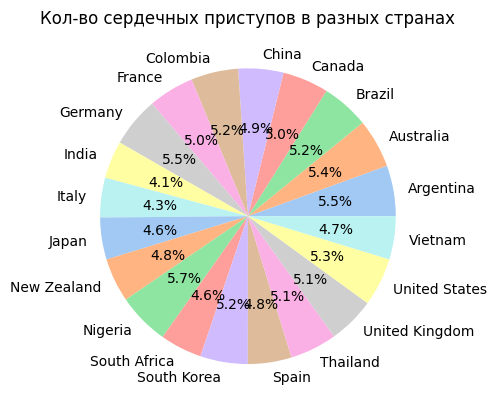

In [ ]:
colors = sns.color_palette('pastel')[ 0:20 ]
plt.pie(x=resss['Heart Attack Risk'],labels=resss['Country'],colors=colors,autopct='%1.1f%%')
plt.title("Кол-во сердечных приступов в разных странах")

Text(0.5, 1.0, 'Доход')

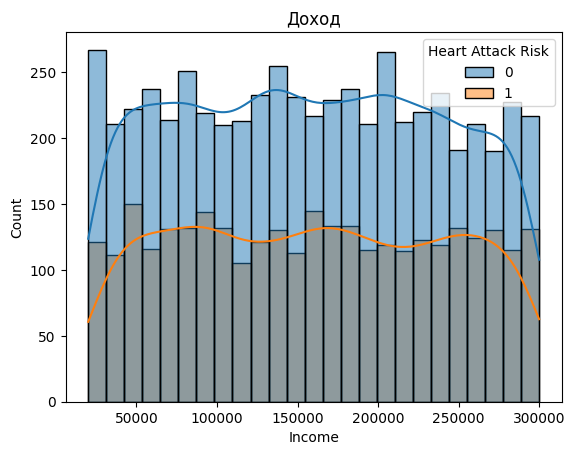

In [ ]:
sns.histplot(x='Income', hue='Heart Attack Risk', data=df, bins=25, kde=True)
plt.title('Доход')

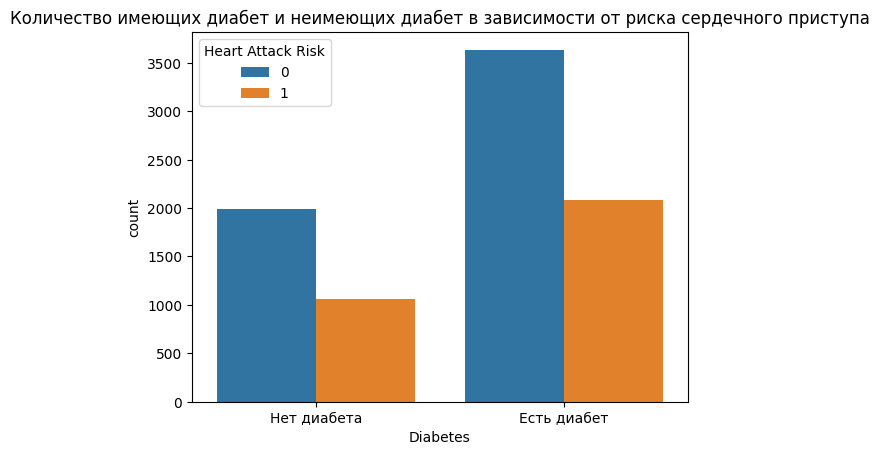

In [ ]:
d = sns.countplot(x='Diabetes', hue='Heart Attack Risk', data=df)
d.set_xticklabels(("Нет диабета","Есть диабет"))
plt.title('Количество имеющих диабет и неимеющих диабет в зависимости от риска сердечного приступа')
plt.show()